### Store Item Demand Forecasting Challenge

Predict 3 months of item sales at different stores (deep learning)

In [112]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [113]:
train = pd.read_csv("./train.csv", parse_dates=['date'])
test = pd.read_csv("./test.csv", parse_dates=['date'])

# Convert the date column to a datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])


# Extract year, month, and day as separate columns
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day



In [114]:
print(train.head())
print(test.head())

        date  store  item  sales  year  month  day
0 2013-01-01      1     1     13  2013      1    1
1 2013-01-02      1     1     11  2013      1    2
2 2013-01-03      1     1     14  2013      1    3
3 2013-01-04      1     1     13  2013      1    4
4 2013-01-05      1     1     10  2013      1    5
   id       date  store  item  year  month  day
0   0 2018-01-01      1     1  2018      1    1
1   1 2018-01-02      1     1  2018      1    2
2   2 2018-01-03      1     1  2018      1    3
3   3 2018-01-04      1     1  2018      1    4
4   4 2018-01-05      1     1  2018      1    5


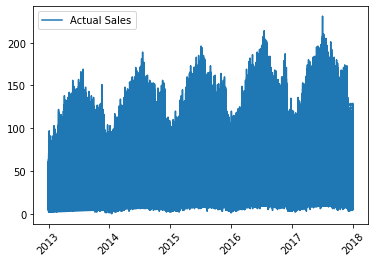

In [115]:
# extract the dates and actual sales from the test data
dates = train['date']
actual_sales = train['sales']

#fig, ax = plt.subplots(figsize=(12, 12))
# create a line plot of the predicted and actual sales
#plt.plot(dates, y_pred, label='Predicted Sales')
plt.plot(dates, actual_sales, label='Actual Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [116]:
train = train.drop(['date'], axis=1)
X_train = train.drop(['sales'], axis=1)
y_train = train['sales']

test = test.drop(['date'], axis=1)
test = test.drop(['id'], axis=1)
X_test = test

In [117]:
# Data preprocessing
X_train = train[['year', 'month', 'day']].values
y_train = train.iloc[:, -1].values
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))




#X_test = test.iloc[:, :-1].values
#y_test = test.iloc[:, -1].values
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#### Recurrent Neural Networks (RNN) with Keras

Built-in RNN layers: a simple example
There are three built-in RNN layers in Keras:

keras.layers.SimpleRNN, a fully-connected RNN where the output from previous timestep is to be fed to next timestep.

keras.layers.GRU, first proposed in Cho et al., 2014.

keras.layers.LSTM, first proposed in Hochreiter & Schmidhuber, 1997.

In early 2015, Keras had the first reusable open-source Python implementations of LSTM and GRU.

Here is a simple example of a Sequential model that processes sequences of integers, embeds each integer into a 64-dimensional vector, then processes the sequence of vectors using a LSTM layer.

##### Built-in RNNs support a number of useful features:

Recurrent dropout, via the dropout and recurrent_dropout arguments
Ability to process an input sequence in reverse, via the go_backwards argument
Loop unrolling (which can lead to a large speedup when processing short sequences on CPU), via the unroll argument
...and more.
For more information, see the RNN API documentation.

In [118]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

In [119]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In the context of deep learning, an epoch refers to one complete iteration over the entire dataset during training. During each epoch, the model makes predictions on the training data, calculates the loss between the predicted values and the actual values, and updates the model's parameters to minimize the loss.

One epoch consists of multiple iterations, where each iteration processes a batch of data. The number of iterations per epoch depends on the batch size, which is the number of samples that the model processes at once before updating the parameters.

For example, if you have a dataset of 1000 samples and a batch size of 32, it will take 32 iterations to process the entire dataset once, so one epoch will consist of 32 iterations.

In general, increasing the number of epochs can improve the model's performance up to a point, as the model has more opportunities to learn from the data. However, training the model for too many epochs can lead to overfitting, where the model starts to memorize the training data instead of learning to generalize to new data. It's important to monitor the model's performance on a separate validation set and use techniques such as early stopping to prevent overfitting.

In [120]:
# Define early stopping and model checkpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('sales_model.h5', save_best_only=True, verbose=1)

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[early_stop, model_checkpoint])


Epoch 1/25
22815/22825 [============================>.] - ETA: 0s - loss: 2.3655
Epoch 1: val_loss improved from inf to 0.01545, saving model to sales_model.h5
22825/22825 [==============================] - 66s 3ms/step - loss: 2.3650 - val_loss: 0.0155
Epoch 2/25
22819/22825 [============================>.] - ETA: 0s - loss: 0.7735
Epoch 2: val_loss did not improve from 0.01545
22825/22825 [==============================] - 83s 4ms/step - loss: 0.7735 - val_loss: 0.0320
Epoch 3/25
22814/22825 [============================>.] - ETA: 0s - loss: 0.5450
Epoch 3: val_loss did not improve from 0.01545
22825/22825 [==============================] - 82s 4ms/step - loss: 0.5450 - val_loss: 0.0342
Epoch 4/25
22812/22825 [============================>.] - ETA: 0s - loss: 0.4449
Epoch 4: val_loss did not improve from 0.01545
22825/22825 [==============================] - 83s 4ms/step - loss: 0.4448 - val_loss: 0.0213
Epoch 5/25
22816/22825 [============================>.] - ETA: 0s - loss: 0.3942

In [121]:
# Load the saved model
model = tf.keras.models.load_model('sales_model.h5')

In [122]:
# Preprocess the test data
X_test = test[['year', 'month', 'day']].values
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [123]:
# Make predictions on the test data
y_pred = model.predict(X_test)

1407/1407 [==============================] - 3s 1ms/step


In [124]:
# Add the predicted sales values to the test dataset
test['sales'] = y_pred

In [125]:
# Save the test dataset with predicted sales values to a CSV file
#test.to_csv('predicted_sales.csv', index=False)

In [126]:
test

,store,item,year,month,day,sales
0,1,1,2018,1,1,1.094880
1,1,1,2018,1,2,1.983991
2,1,1,2018,1,3,2.945449
3,1,1,2018,1,4,3.831769
4,1,1,2018,1,5,4.976740
...,...,...,...,...,...,...
44995,10,50,2018,3,27,26.960119
44996,10,50,2018,3,28,27.979479
44997,10,50,2018,3,29,29.058455
44998,10,50,2018,3,30,30.060242
